In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(Path('../credit_card_data.csv'))
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,0.0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2
1,5008808,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
2,5008810,0.0,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
3,5008811,0.0,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
4,5008815,0.0,0,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,Accountants,2


In [3]:
df.nunique()

ID                     17043
MONTHS_BALANCE             1
STATUS                     8
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               8
AMT_INCOME_TOTAL         189
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              4792
DAYS_EMPLOYED           3124
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS            9
dtype: int64

In [9]:
df['AGE'] = -df['DAYS_BIRTH'] // 365
df['TIME_JOBBING'] = -df['DAYS_EMPLOYED'] //365

In [11]:
df = df.drop(columns=[
    'ID',
    'MONTHS_BALANCE',
    'DAYS_EMPLOYED',
    'DAYS_BIRTH'
])
df.head()

,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,TIME_JOBBING
0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3
1,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8
2,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8
3,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8
4,0,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2,46,2


In [12]:
label_enc = LabelEncoder()

importances_list = {}
for column in df.columns:
    X = label_enc.fit_transform(df[column]).reshape(-1,1)
    y = label_enc.fit_transform(df['STATUS'])
    importances = mutual_info_classif(X, y)
    importances_list[column] = importances[0]

In [13]:
print(importances_list)

{'STATUS': 1.0798718359570758, 'CODE_GENDER': 0.005968425823741796, 'FLAG_OWN_CAR': 0.002053087922077035, 'FLAG_OWN_REALTY': 0.008065606050696728, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 0.010288516641741907, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0.005020427247805159, 'NAME_HOUSING_TYPE': 0, 'OCCUPATION_TYPE': 0.00016201528147385957, 'CNT_FAM_MEMBERS': 0, 'AGE': 0.0034277179091610765, 'TIME_JOBBING': 0.004335390016132701}


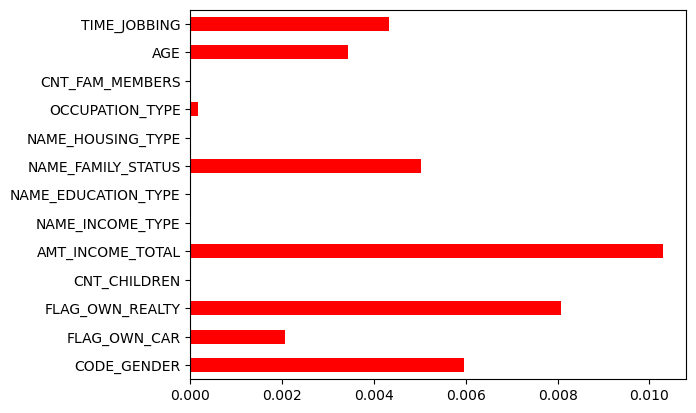

In [14]:
importances_list_df = pd.Series(importances_list)
importances_list_df = importances_list_df.drop('STATUS')
importances_list_df.plot(kind='barh', color='red')
plt.show()